## Summary

In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,241,1332137514329645059,Día 26: Mapa con Nueva Herramienta #30DayMapC...,es,2020-11-27 01:41:47,4,5,"[{'text': '30DayMapChallenge', 'indices': [36,...",72170599,Mario Hernández,armiok,Ecatepec de Morelos,562,148,http://pbs.twimg.com/media/Enyx0L1W4AAR9gR.jpg,https://twitter.com/twitter/statuses/133213751...
7121,242,1332129362112434176,#30DayMapChallenge 26/30: New Tool. Tried to m...,en,2020-11-27 01:09:24,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",1224107513131327488,keirtography,keirtography,"Ventura, CA",65,203,http://pbs.twimg.com/media/EnysleLVQAE18IE.jpg,https://twitter.com/twitter/statuses/133212936...
7122,243,1332126230880116738,#30DayMapChallenge Day 26 New Tool\n\nFirst ti...,en,2020-11-27 00:56:57,1,3,"[{'text': '30DayMapChallenge', 'indices': [0, ...",910889225448439808,Dennis Kao,professorkao,NaN,130,249,http://pbs.twimg.com/media/Enyo5zBWEAQnFt8.jpg,https://twitter.com/twitter/statuses/133212623...
7123,244,1332117923029278721,refuse to turn my computer on today so for #30...,en,2020-11-27 00:23:57,2,30,"[{'text': '30DayMapChallenge', 'indices': [43,...",14913762,vicky johnson-dahl,hurricanevicky,"Washington, DC",1001,860,http://pbs.twimg.com/media/EnyiMHNXYAAjvsS.jpg,https://twitter.com/twitter/statuses/133211792...


In [3]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [4]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url,date
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh,2020-11-01
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e,2020-11-01
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ,2020-11-01
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ,2020-11-01
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7120,241,1332137514329645059,Día 26: Mapa con Nueva Herramienta #30DayMapC...,es,2020-11-27 01:41:47,4,5,"[{'text': '30DayMapChallenge', 'indices': [36,...",72170599,Mario Hernández,armiok,Ecatepec de Morelos,562,148,http://pbs.twimg.com/media/Enyx0L1W4AAR9gR.jpg,https://twitter.com/twitter/statuses/133213751...,2020-11-27
7121,242,1332129362112434176,#30DayMapChallenge 26/30: New Tool. Tried to m...,en,2020-11-27 01:09:24,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",1224107513131327488,keirtography,keirtography,"Ventura, CA",65,203,http://pbs.twimg.com/media/EnysleLVQAE18IE.jpg,https://twitter.com/twitter/statuses/133212936...,2020-11-27
7122,243,1332126230880116738,#30DayMapChallenge Day 26 New Tool\n\nFirst ti...,en,2020-11-27 00:56:57,1,3,"[{'text': '30DayMapChallenge', 'indices': [0, ...",910889225448439808,Dennis Kao,professorkao,NaN,130,249,http://pbs.twimg.com/media/Enyo5zBWEAQnFt8.jpg,https://twitter.com/twitter/statuses/133212623...,2020-11-27
7123,244,1332117923029278721,refuse to turn my computer on today so for #30...,en,2020-11-27 00:23:57,2,30,"[{'text': '30DayMapChallenge', 'indices': [43,...",14913762,vicky johnson-dahl,hurricanevicky,"Washington, DC",1001,860,http://pbs.twimg.com/media/EnyiMHNXYAAjvsS.jpg,https://twitter.com/twitter/statuses/133211792...,2020-11-27


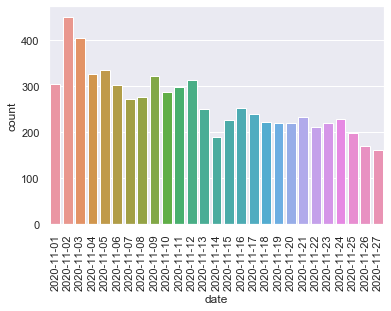

In [5]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)
plt.xticks(rotation=90)

plt.savefig("./graphs/maps_count.png", bbox_inches = 'tight')